In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv('red_wine.csv')


In [2]:
df.head()

,citric acid,sulphates,alcohol,type
0,0.49,0.63,8.0,low
1,0.66,0.57,8.3,low
2,0.23,0.44,8.5,high
3,0.44,0.84,8.6,low
4,0.08,0.50,8.7,low


In [3]:
df.tail()

,citric acid,sulphates,alcohol,type
566,0.40,0.70,12.7,low
567,0.28,0.60,12.8,high
568,0.31,0.60,12.8,high
569,0.34,0.72,12.8,low
570,0.35,0.32,12.8,high


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 571 entries, 0 to 570
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   citric acid  571 non-null    float64
 1   sulphates    571 non-null    float64
 2   alcohol      571 non-null    float64
 3   type         571 non-null    object 
dtypes: float64(3), object(1)
memory usage: 18.0+ KB


In [5]:
df.describe()

,citric acid,sulphates,alcohol
count,571.000000,571.000000,571.000000
mean,0.324676,0.588161,10.776883
std,0.175103,0.188478,1.092562
min,0.000000,0.250000,8.000000
25%,0.240000,0.450000,9.900000
50%,0.330000,0.570000,10.800000
75%,0.440000,0.710000,11.600000
max,1.000000,2.000000,12.800000


In [22]:
import pandas as pd
from ydata_profiling import ProfileReport
df = pd.read_csv('red_wine.csv')
profile = ProfileReport(df)
profile




Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [9]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate

# Load the red wine dataset
df_red = pd.read_csv('red_wine.csv')

# Define features (X) and target (y)
X_red = df_red.drop('type', axis=1)
y_red = df_red['type']

# Initialize a dictionary to store results
results_dict_red = {'Model': [], 'Accuracy': [], 'AUC': []}

# Baseline Model
baseline_accuracy_red = (y_red.value_counts().max()) / len(y_red)
baseline_auc_red = 0.5  # Random classifier AUC

results_dict_red['Model'].append('Baseline')
results_dict_red['Accuracy'].append(baseline_accuracy_red)
results_dict_red['AUC'].append(baseline_auc_red)

# Logistic Regression
lr_red = LogisticRegression()
lr_accuracy_red = cross_val_score(lr_red, X_red, y_red, cv=10, scoring='accuracy').mean()
lr_auc_red = cross_val_score(lr_red, X_red, y_red, cv=10, scoring='roc_auc').mean()

results_dict_red['Model'].append('Logistic Regression')
results_dict_red['Accuracy'].append(lr_accuracy_red)
results_dict_red['AUC'].append(lr_auc_red)

# Naive Bayes
nb_red = GaussianNB()
nb_accuracy_red = cross_val_score(nb_red, X_red, y_red, cv=10, scoring='accuracy').mean()
nb_auc_red = cross_val_score(nb_red, X_red, y_red, cv=10, scoring='roc_auc').mean()

results_dict_red['Model'].append('Naive Bayes')
results_dict_red['Accuracy'].append(nb_accuracy_red)
results_dict_red['AUC'].append(nb_auc_red)

# Decision Tree
dt_red = DecisionTreeClassifier()
dt_accuracy_red = cross_val_score(dt_red, X_red, y_red, cv=10, scoring='accuracy').mean()
dt_auc_red = cross_val_score(dt_red, X_red, y_red, cv=10, scoring='roc_auc').mean()

results_dict_red['Model'].append('Decision Tree')
results_dict_red['Accuracy'].append(dt_accuracy_red)
results_dict_red['AUC'].append(dt_auc_red)

# SVM - Linear
svm_linear_red = SVC(kernel='linear')
svm_linear_accuracy_red = cross_val_score(svm_linear_red, X_red, y_red, cv=10, scoring='accuracy').mean()
svm_linear_auc_red = cross_val_score(svm_linear_red, X_red, y_red, cv=10, scoring='roc_auc').mean()

results_dict_red['Model'].append('SVM Linear')
results_dict_red['Accuracy'].append(svm_linear_accuracy_red)
results_dict_red['AUC'].append(svm_linear_auc_red)

# SVM - RBF
svm_rbf_red = SVC(kernel='rbf')
svm_rbf_accuracy_red = cross_val_score(svm_rbf_red, X_red, y_red, cv=10, scoring='accuracy').mean()
svm_rbf_auc_red = cross_val_score(svm_rbf_red, X_red, y_red, cv=10, scoring='roc_auc').mean()

results_dict_red['Model'].append('SVM RBF')
results_dict_red['Accuracy'].append(svm_rbf_accuracy_red)
results_dict_red['AUC'].append(svm_rbf_auc_red)

# Random Forest
rf_red = RandomForestClassifier()
rf_accuracy_red = cross_val_score(rf_red, X_red, y_red, cv=10, scoring='accuracy').mean()
rf_auc_red = cross_val_score(rf_red, X_red, y_red, cv=10, scoring='roc_auc').mean()

results_dict_red['Model'].append('Random Forest')
results_dict_red['Accuracy'].append(rf_accuracy_red)
results_dict_red['AUC'].append(rf_auc_red)

# Convert results to a DataFrame for easy manipulation
results_df_red = pd.DataFrame(results_dict_red)

# Define a function to highlight the highest values in a Series
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Highlight the highest Accuracy and AUC values
results_df_red_styled = (results_df_red
    .style
    .apply(highlight_max, subset=['Accuracy', 'AUC'])
    .set_table_styles([{'selector': 'tr:hover','props': 'background-color: yellow;'}])
)

# Display the results with styling
display(results_df_red_styled)

# Get the best model
best_model_red = results_df_red.loc[results_df_red['AUC'].idxmax()]

print(f"The best model for red wine is {best_model_red['Model']} with an AUC of {best_model_red['AUC']}")


,Model,Accuracy,AUC
0,Baseline,0.528897,0.500000
1,Logistic Regression,0.784785,0.879902
2,Naive Bayes,0.821627,0.895408
3,Decision Tree,0.753267,0.743844
4,SVM Linear,0.791863,0.881489
5,SVM RBF,0.535844,0.868920
6,Random Forest,0.797066,0.887770


The best model for red wine is Naive Bayes with an AUC of 0.8954078975584352


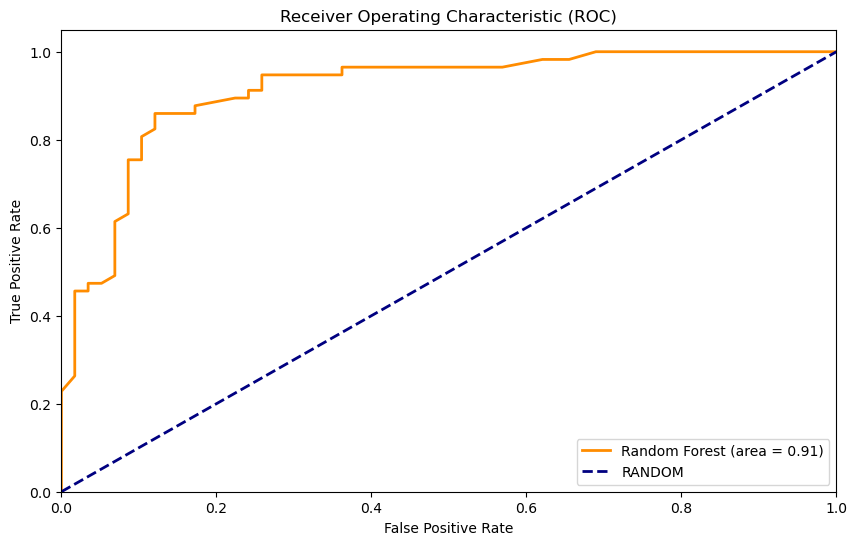

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder

# Create label encoder
label_encoder = LabelEncoder()

X = df.drop('type', axis=1)
y = label_encoder.fit_transform(df['type'])

# Split data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Random Forest model
rf = RandomForestClassifier()
rf.fit(X_train, y_train)

# Get predicted probabilities
y_score = rf.predict_proba(X_test)

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_score[:, 1])

# Calculate AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(10, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Random Forest (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, label = 'RANDOM', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [12]:
import pandas as pd 

In [13]:
df1 = pd.read_csv('white_wine.csv')
print(df1.columns)

Index(['citric acid', 'sulphates', 'alcohol', 'type'], dtype='object')


In [14]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78 entries, 0 to 77
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   citric acid  78 non-null     float64
 1   sulphates    78 non-null     float64
 2   alcohol      78 non-null     float64
 3   type         78 non-null     object 
dtypes: float64(3), object(1)
memory usage: 2.6+ KB


In [21]:
import pandas as pd
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import LabelEncoder

# Load the white-wine dataset
white_wine_df = pd.read_csv('white_wine.csv')

# Prepare features and target
X_white = white_wine_df[['citric acid', 'sulphates', 'alcohol']]
y_white = white_wine_df['type']

# Assuming 'type' is categorical, encode it
# If 'type' is already encoded, you can skip this step

label_encoder = LabelEncoder()
y_encoded_white = label_encoder.fit_transform(y_white)

# Initialize the Naive Bayes model
nb = GaussianNB()

# Train the model on white wine data (X_white, y_encoded_white)
nb.fit(X_white, y_encoded_white)

# Make predictions on the white wine data
y_pred_white = nb.predict(X_white)

# Calculate AUC score
auc_score_white = roc_auc_score(y_encoded_white, y_pred_white)

print(f"AUC Score on white wine data: {auc_score_white}")

AUC Score on white wine data: 0.8871745419479266


In [17]:
import pandas as pd
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from tabulate import tabulate

# Load the white wine dataset
df_white = pd.read_csv('white_wine.csv')

# Define features (X) and target (y)
X_white = df_white[['citric acid', 'sulphates', 'alcohol']]
y_white = df_white['type']

# Initialize a dictionary to store results
results_dict_white = {'Model': [], 'Accuracy': [], 'AUC': []}

# Baseline Model
baseline_accuracy_white = (y_white.value_counts().max()) / len(y_white)
baseline_auc_white = 0.5  # Random classifier AUC

results_dict_white['Model'].append('Baseline')
results_dict_white['Accuracy'].append(baseline_accuracy_white)
results_dict_white['AUC'].append(baseline_auc_white)

# Logistic Regression
lr_white = LogisticRegression()
lr_accuracy_white = cross_val_score(lr_white, X_white, y_white, cv=10, scoring='accuracy').mean()
lr_auc_white = cross_val_score(lr_white, X_white, y_white, cv=10, scoring='roc_auc').mean()

results_dict_white['Model'].append('Logistic Regression')
results_dict_white['Accuracy'].append(lr_accuracy_white)
results_dict_white['AUC'].append(lr_auc_white)

# Naive Bayes
nb_white = GaussianNB()
nb_accuracy_white = cross_val_score(nb_white, X_white, y_white, cv=10, scoring='accuracy').mean()
nb_auc_white = cross_val_score(nb_white, X_white, y_white, cv=10, scoring='roc_auc').mean()

results_dict_white['Model'].append('Naive Bayes')
results_dict_white['Accuracy'].append(nb_accuracy_white)
results_dict_white['AUC'].append(nb_auc_white)

# Decision Tree
dt_white = DecisionTreeClassifier()
dt_accuracy_white = cross_val_score(dt_white, X_white, y_white, cv=10, scoring='accuracy').mean()
dt_auc_white = cross_val_score(dt_white, X_white, y_white, cv=10, scoring='roc_auc').mean()

results_dict_white['Model'].append('Decision Tree')
results_dict_white['Accuracy'].append(dt_accuracy_white)
results_dict_white['AUC'].append(dt_auc_white)

# SVM - Linear
svm_linear_white = SVC(kernel='linear')
svm_linear_accuracy_white = cross_val_score(svm_linear_white, X_white, y_white, cv=10, scoring='accuracy').mean()
svm_linear_auc_white = cross_val_score(svm_linear_white, X_white, y_white, cv=10, scoring='roc_auc').mean()

results_dict_white['Model'].append('SVM Linear')
results_dict_white['Accuracy'].append(svm_linear_accuracy_white)
results_dict_white['AUC'].append(svm_linear_auc_white)

# SVM - RBF
svm_rbf_white = SVC(kernel='rbf')
svm_rbf_accuracy_white = cross_val_score(svm_rbf_white, X_white, y_white, cv=10, scoring='accuracy').mean()
svm_rbf_auc_white = cross_val_score(svm_rbf_white, X_white, y_white, cv=10, scoring='roc_auc').mean()

results_dict_white['Model'].append('SVM RBF')
results_dict_white['Accuracy'].append(svm_rbf_accuracy_white)
results_dict_white['AUC'].append(svm_rbf_auc_white)

# Random Forest
rf_white = RandomForestClassifier()
rf_accuracy_white = cross_val_score(rf_white, X_white, y_white, cv=10, scoring='accuracy').mean()
rf_auc_white = cross_val_score(rf_white, X_white, y_white, cv=10, scoring='roc_auc').mean()

results_dict_white['Model'].append('Random Forest')
results_dict_white['Accuracy'].append(rf_accuracy_white)
results_dict_white['AUC'].append(rf_auc_white)

# Convert results to a DataFrame for easy manipulation
results_df_white = pd.DataFrame(results_dict_white)

# Define a function to highlight the highest values in a Series
def highlight_max(s):
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]

# Highlight the highest Accuracy and AUC values
results_df_white_styled = (results_df_white
    .style
    .apply(highlight_max, subset=['Accuracy', 'AUC'])
    .set_table_styles([{'selector': 'tr:hover','props': 'background-color: yellow;'}])
)

# Display the results with styling
display(results_df_white_styled)

# Get the best model
best_model_white = results_df_white.loc[results_df_white['AUC'].idxmax()]

print(f"The best model for white wine is {best_model_white['Model']} with an AUC of {best_model_white['AUC']}")


,Model,Accuracy,AUC
0,Baseline,0.782051,0.500000
1,Logistic Regression,0.858929,0.966667
2,Naive Bayes,0.932143,0.950000
3,Decision Tree,0.898214,0.775000
4,SVM Linear,0.858929,0.966667
5,SVM RBF,0.783929,0.913095
6,Random Forest,0.896429,0.962500


The best model for white wine is Logistic Regression with an AUC of 0.9666666666666668


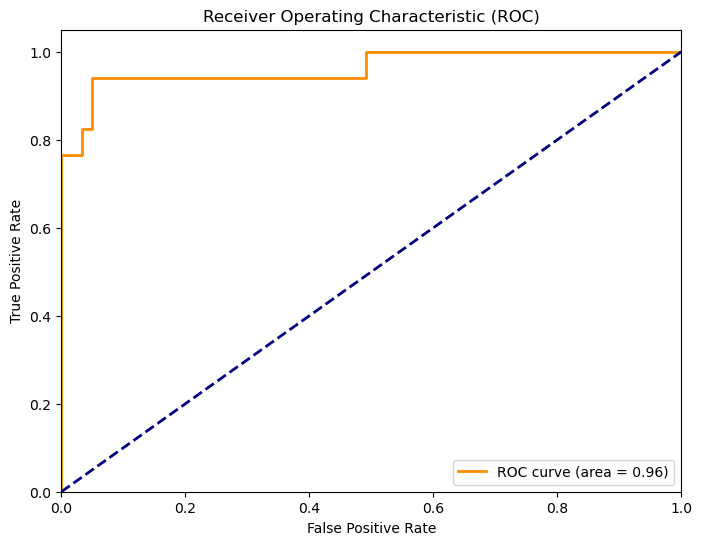

In [18]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Assuming lr_white is your Logistic Regression model
# Assuming X_white and y_white are your features and target

# Fit the Logistic Regression model
lr_white.fit(X_white, y_encoded_white)

# Get predicted probabilities
y_score_white = lr_white.predict_proba(X_white)[:, 1]

# Calculate ROC curve
fpr_white, tpr_white, thresholds_white = roc_curve(y_encoded_white, y_score_white)

# Calculate AUC
roc_auc_white = auc(fpr_white, tpr_white)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_white, tpr_white, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc_white)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()
